In [1]:
cd G:\

G:\


In [2]:
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
from cmcrameri import cm
colortable=cm.batlow
import matplotlib.pyplot as plt
import cartopy.io.shapereader as shpreader
import matplotlib.ticker as mticker
import numpy as np
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [ ]:
# df1 = df[df['Fee'] <= 25000]

In [3]:
a2000 = pd.read_excel('IMD_Cyclones_2000.xlsx',usecols='A:M', parse_dates=[['Date(DD-MM-YYYY)', 'Time (UTC)']])
a2001 = pd.read_excel('IMD_Cyclones_2001.xlsx',usecols='A:M', parse_dates=[['Date(DD-MM-YYYY)', 'Time (UTC)']])
a2002 = pd.read_excel('IMD_Cyclones_2002.xlsx',usecols='A:M', parse_dates=[['Date(DD-MM-YYYY)', 'Time (UTC)']])
a2003 = pd.read_excel('IMD_Cyclones_2003.xlsx',usecols='A:M', parse_dates=[['Date(DD-MM-YYYY)', 'Time (UTC)']])
a2004 = pd.read_excel('IMD_Cyclones_2004.xlsx',usecols='A:M', parse_dates=[['Date(DD-MM-YYYY)', 'Time (UTC)']])
a2005 = pd.read_excel('IMD_Cyclones_2005.xlsx',usecols='A:M', parse_dates=[['Date(DD-MM-YYYY)', 'Time (UTC)']]) 
a2006 = pd.read_excel('IMD_Cyclones_2006.xlsx',usecols='A:M', parse_dates=[['Date(DD-MM-YYYY)', 'Time (UTC)']]) 
a2007 = pd.read_excel('IMD_Cyclones_2007.xlsx',usecols='A:M', parse_dates=[['Date(DD-MM-YYYY)', 'Time (UTC)']]) 
a2008 = pd.read_excel('IMD_Cyclones_2008.xlsx',usecols='A:M', parse_dates=[['Date(DD-MM-YYYY)', 'Time (UTC)']]) 
a2009 = pd.read_excel('IMD_Cyclones_2009.xlsx',usecols='A:M', parse_dates=[['Date(DD-MM-YYYY)', 'Time (UTC)']]) 
a2010 = pd.read_excel('IMD_Cyclones_2010.xlsx',usecols='A:M', parse_dates=[['Date(DD-MM-YYYY)', 'Time (UTC)']]) 
a2011 = pd.read_excel('IMD_Cyclones_2011.xlsx',usecols='A:M', parse_dates=[['Date(DD-MM-YYYY)', 'Time (UTC)']]) 
a2012 = pd.read_excel('IMD_Cyclones_2012.xlsx',usecols='A:M', parse_dates=[['Date(DD-MM-YYYY)', 'Time (UTC)']]) 
a2013 = pd.read_excel('IMD_Cyclones_2013.xlsx',usecols='A:M', parse_dates=[['Date(DD-MM-YYYY)', 'Time (UTC)']]) 
a2014 = pd.read_excel('IMD_Cyclones_2014.xlsx',usecols='A:M', parse_dates=[['Date(DD-MM-YYYY)', 'Time (UTC)']]) 
a2015 = pd.read_excel('IMD_Cyclones_2015.xlsx',usecols='A:M', parse_dates=[['Date(DD-MM-YYYY)', 'Time (UTC)']]) 
a2016 = pd.read_excel('IMD_Cyclones_2016.xlsx',usecols='A:M', parse_dates=[['Date(DD-MM-YYYY)', 'Time (UTC)']]) 
a2017 = pd.read_excel('IMD_Cyclones_2017.xlsx',usecols='A:M', parse_dates=[['Date(DD-MM-YYYY)', 'Time (UTC)']]) 
a2018 = pd.read_excel('IMD_Cyclones_2018.xlsx',usecols='A:M', parse_dates=[['Date(DD-MM-YYYY)', 'Time (UTC)']]) 
a2019 = pd.read_excel('IMD_Cyclones_2019.xlsx',usecols='A:M', parse_dates=[['Date(DD-MM-YYYY)', 'Time (UTC)']]) 
a2020 = pd.read_excel('IMD_Cyclones_2020.xlsx',usecols='A:M', parse_dates=[['Date(DD-MM-YYYY)', 'Time (UTC)']]) 
a2021 = pd.read_excel('IMD_Cyclones_2021.xlsx',usecols='A:M', parse_dates=[['Date(DD-MM-YYYY)', 'Time (UTC)']]) 
a2022 = pd.read_excel('IMD_Cyclones_2022.xlsx',usecols='A:M', parse_dates=[['Date(DD-MM-YYYY)', 'Time (UTC)']]) 


In [4]:
frames = [a2000,a2001,a2002,a2003,a2004,a2005,a2006,a2007,a2008,a2009,a2010,
         a2011,a2012,a2013,a2014,a2015,a2016,a2017,a2018,a2019,a2020,a2021,
         a2022]

total = pd.concat(frames)
for i in frames:
    del i

In [5]:
total.columns

Index(['Date(DD-MM-YYYY)_Time (UTC)', 'Serial Number of system during year',
       'Basin of origin', 'Name', 'Latitude (lat)', 'longitude  (Long)',
       'CI No [or "T. No"]', 'Estimated Central Pressure (hPa) [or "E.C.P"]',
       'Maximum Sustained Surface Wind (kt) ',
       'Pressure Drop(hPa)[or"delta P"]', 'Grade (text)', 'Type',
       'Pressure Drop (hPa)[or "delta P"]'],
      dtype='object')

In [ ]:
total[['CI No [or "T. No"]']] = total[['CI No [or "T. No"]']].fillna(0)
total = total.astype({'CI No [or "T. No"]':'int'})

# Seperating Land and Ocean

In [ ]:
one = (total['CI No [or "T. No"]'] == 1.5 )
ci_1 = total.loc[one]
total

In [ ]:
print(ci_1['CI No [or "T. No"]'].value_counts()[3.5])

In [ ]:
start_date = '2005-10-01'
end_date = '2005-12-31'
# Select DataFrame rows between two dates
mask_season = (total['Date(DD-MM-YYYY)_Time (UTC)'] >= start_date) & (total['Date(DD-MM-YYYY)_Time (UTC)'] <= end_date)
ondj = total.loc[mask_season]


In [ ]:
ondj= total[total['Date(DD-MM-YYYY)_Time (UTC)'].dt.month.isin([10,11,12])]

In [ ]:
fname= r'F:\Indian Shape Files\Indian Administrative bourders\IND_adm\IND_adm1.shp'
adm1_shapes = list(shpreader.Reader(fname).geometries())
fname2 = r'F:\Indian Shape Files\Only Indian Boundaries\India_Boundary\India_Boundary.shp'
adm1_shapes2 = list(shpreader.Reader(fname2).geometries())

lonmin =82#80
lonmax =96#94
latmin =10#5
latmax =24#23


def main():
    plt.figure(figsize=(15,12),facecolor = 'white')
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([lonmin,lonmax,latmin,latmax], crs=ccrs.PlateCarree()) # [lonmin,lonmax,latmin,latmax]68,98,8,38
    ax.coastlines()
    ax.add_geometries(adm1_shapes, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.5,lw = 1, facecolor='none') #
    ax.add_geometries(adm1_shapes2, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.5,lw = 1, facecolor='none') #
#     ax.add_geometries(adm1_shapes3, ccrs.PlateCarree(),
#                   edgecolor='red', alpha=0.5,lw = 2, facecolor='none') #
#     ax.add_feature(cfeature.LAND, edgecolor='black')
#     ax.add_feature(cfeature.BORDERS,lw = 2,edgecolor='red')
#     ax.add_feature(cfeature.STATES.with_scale('10m'),
#                linestyle='-', alpha=.25, facecolor='none',lw = 2, edgecolor='red')
    
#     ax.add_feature(cfeature.COASTLINE)
#     ax.gridlines()
    ax.set_facecolor('white')
    ax.set_title('MODIS AOD 3KM' ,
                  fontweight="bold", size=20,family= 'Arial')
#     filled_c = plt.pcolormesh(modis.lon, modis.lat,np.mean(modis.Optical_Depth_Land_And_Ocean[:,:,:],axis=0), vmin=0, vmax=2, cmap='jet', transform=ccrs.PlateCarree())
    ax.scatter(o2005['longitude  (Long)'],o2005['Latitude (lat)'],s=10,alpha=0.5,c='purple')
    ax.scatter(o2006['longitude  (Long)'],o2006['Latitude (lat)'],s=10,alpha=0.5,c='purple') # Lands are there
    ax.scatter(o2007['longitude  (Long)'],o2007['Latitude (lat)'],s=10,alpha=0.5,c='purple')
    ax.scatter(o2008['longitude  (Long)'],o2008['Latitude (lat)'],s=10,alpha=0.5,c='purple') # little Lands are there
    ax.scatter(o2009['longitude  (Long)'],o2009['Latitude (lat)'],s=10,alpha=0.5,c='purple')
    ax.scatter(o2010['longitude  (Long)'],o2010['Latitude (lat)'],s=10,alpha=0.5,c='purple')
    ax.scatter(o2011['longitude  (Long)'],o2011['Latitude (lat)'],s=10,alpha=0.5,c='purple')
    ax.scatter(o2012['longitude  (Long)'],o2012['Latitude (lat)'],s=10,alpha=0.5,c='purple')
    ax.scatter(o2013['longitude  (Long)'],o2013['Latitude (lat)'],s=10,alpha=0.5,c='purple')
    ax.scatter(o2014['longitude  (Long)'],o2014['Latitude (lat)'],s=10,alpha=0.5,c='purple')
    ax.scatter(o2015['longitude  (Long)'],o2015['Latitude (lat)'],s=10,alpha=0.5,c='purple')
    ax.scatter(o2016['longitude  (Long)'],o2016['Latitude (lat)'],s=10,alpha=0.5,c='purple')# Lands are there
    ax.scatter(o2017['longitude  (Long)'],o2017['Latitude (lat)'],s=10,alpha=0.5,c='purple')# Little Lands are there
    ax.scatter(o2018['longitude  (Long)'],o2018['Latitude (lat)'],s=10,alpha=0.5,c='purple')
    ax.scatter(o2019['longitude  (Long)'],o2019['Latitude (lat)'],s=10,alpha=0.5,c='purple')
    ax.scatter(o2020['longitude  (Long)'],o2020['Latitude (lat)'],s=10,alpha=0.5,c='purple')# Lands are there
    ax.scatter(o2021['longitude  (Long)'],o2021['Latitude (lat)'],s=10,alpha=0.5,c='purple') 
    ax.scatter(o2022['longitude  (Long)'],o2022['Latitude (lat)'],s=10,alpha=0.5,c='purple')
#     ax.legend()
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = mticker.FixedLocator(np.arange(lonmin,lonmax,1))
    gl.ylocator = mticker.FixedLocator(np.arange(latmin,latmax,1))
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 12,'color': 'black', 'weight': 'bold'}
    gl.ylabel_style = {'size': 12,'color': 'black', 'weight': 'bold'}
        # Add a colorbar for the filled contour.
#     a = plt.colorbar(filled_c,ax=ax, orientation='vertical',pad=0.05,shrink=0.75)
#     a.set_label(label=f'AOD',weight='bold', fontsize='15')
#     plt.figtext(0.25, 0.085, "\xa9 kmmraoiitm@gmail.com", ha="center", 
#                 fontsize=15)#box={"facecolor": "green", "alpha": 0.75})

if __name__ == '__main__':
    main()
# plt.savefig('Trop_NO2_TROPOMI_S5P_on_23102022.jpg',bbox_inches='tight',dpi=720)
plt.show()

# Total cyclones

In [ ]:
tot = pd.read_excel('cyclones.xlsx')

In [ ]:
tot.columns

In [ ]:
d = (ondj['Grade (text)'] =='D')
depression = ondj.loc[d]
dd = (ondj['Grade (text)'] =='DD')
deep_depression = ondj.loc[dd]
cs = (ondj['Grade (text)'] =='CS')
cyclon = ondj.loc[cs]
scs = (ondj['Grade (text)'] =='SCS')
sever = ondj.loc[scs]
vscs = (ondj['Grade (text)'] =='VSCS')
very = ondj.loc[vscs]
escs = (ondj['Grade (text)'] =='ESCS')
extra = ondj.loc[escs]


In [ ]:
fname= r'F:\Indian Shape Files\Indian Administrative bourders\IND_adm\IND_adm1.shp'
adm1_shapes = list(shpreader.Reader(fname).geometries())
fname2 = r'F:\Indian Shape Files\Only Indian Boundaries\India_Boundary\India_Boundary.shp'
adm1_shapes2 = list(shpreader.Reader(fname2).geometries())

lonmin =46
lonmax =106
latmin =0
latmax =32


def main():
    plt.figure(figsize=(15,12),facecolor = 'white')
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([lonmin,lonmax,latmin,latmax], crs=ccrs.PlateCarree()) # [lonmin,lonmax,latmin,latmax]68,98,8,38
    ax.coastlines()
    ax.add_geometries(adm1_shapes, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.5,lw = 1, facecolor='none') #
    ax.add_geometries(adm1_shapes2, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.5,lw = 1, facecolor='none') #
#     ax.add_geometries(adm1_shapes3, ccrs.PlateCarree(),
#                   edgecolor='red', alpha=0.5,lw = 2, facecolor='none') #
#     ax.add_feature(cfeature.LAND, edgecolor='black')
#     ax.add_feature(cfeature.BORDERS,lw = 2,edgecolor='red')
#     ax.add_feature(cfeature.STATES.with_scale('10m'),
#                linestyle='-', alpha=.25, facecolor='none',lw = 2, edgecolor='red')
    
#     ax.add_feature(cfeature.COASTLINE)
#     ax.gridlines()
    ax.set_facecolor('white')
    ax.set_title('CI 1.0 in NIO during OND 2000-2022' ,
                  fontweight="bold", size=20,family= 'Arial')
#     filled_c = plt.pcolormesh(modis.lon, modis.lat,np.mean(modis.Optical_Depth_Land_And_Ocean[:,:,:],axis=0), vmin=0, vmax=2, cmap='jet', transform=ccrs.PlateCarree())
    ax.scatter(ci_1['longitude  (Long)'],ci_1['Latitude (lat)'],s=10,alpha=0.5,c='purple')
#     ax.scatter(deep_depression['longitude  (Long)'],deep_depression['Latitude (lat)'],s=10,alpha=0.5,c='blue')
#     ax.scatter(cyclon['longitude  (Long)'],cyclon['Latitude (lat)'],s=10,alpha=0.5,c='red')
#     ax.scatter(sever['longitude  (Long)'],sever['Latitude (lat)'],s=10,alpha=0.5,c='green')
#     ax.scatter(very['longitude  (Long)'],very['Latitude (lat)'],s=10,alpha=0.5,c='maroon')
#     ax.scatter(extra['longitude  (Long)'],extra['Latitude (lat)'],s=10,alpha=0.5,c='magenta')
    
#     ax.legend()
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = mticker.FixedLocator(np.arange(lonmin,lonmax,2))
    gl.ylocator = mticker.FixedLocator(np.arange(latmin,latmax,2))
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 12,'color': 'black', 'weight': 'bold'}
    gl.ylabel_style = {'size': 12,'color': 'black', 'weight': 'bold'}
        # Add a colorbar for the filled contour.
#     a = plt.colorbar(filled_c,ax=ax, orientation='vertical',pad=0.05,shrink=0.75)
#     a.set_label(label=f'AOD',weight='bold', fontsize='15')
#     plt.figtext(0.25, 0.085, "\xa9 kmmraoiitm@gmail.com", ha="center", 
#                 fontsize=15)#box={"facecolor": "green", "alpha": 0.75})

if __name__ == '__main__':
    main()
plt.savefig('CI1_2000_2022.jpg',bbox_inches='tight',dpi=1080)
plt.show()

In [ ]:
85,87,15,17,

In [ ]:
lat_min = 9
lat_max = 11
lon_min = 93
lon_max = 95
# Select DataFrame rows between two dates
mask_season1 = (total['Latitude (lat)'] >= lat_min) & (total['Latitude (lat)'] < lat_max)
#                 
grid_a = total.loc[mask_season1]
mask_season2 = (grid_a['longitude  (Long)'] >= lon_min) & (grid_a['longitude  (Long)'] < lon_max)
grid_b = grid_a.loc[mask_season2]

grid_b.to_excel('grid45.xlsx')
del grid_a
del grid_b

In [ ]:
grid_b['longitude  (Long)','Latitude (lat)',]

In [ ]:
fname= r'F:\Indian Shape Files\Indian Administrative bourders\IND_adm\IND_adm1.shp'
adm1_shapes = list(shpreader.Reader(fname).geometries())
fname2 = r'F:\Indian Shape Files\Only Indian Boundaries\India_Boundary\India_Boundary.shp'
adm1_shapes2 = list(shpreader.Reader(fname2).geometries())

lonmin =47#80
lonmax =96#94
latmin =5#5
latmax =36#23


def main():
    plt.figure(figsize=(15,12),facecolor = 'white')
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([lonmin,lonmax,latmin,latmax], crs=ccrs.PlateCarree()) # [lonmin,lonmax,latmin,latmax]68,98,8,38
    ax.coastlines()
    ax.add_geometries(adm1_shapes, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.5,lw = 1, facecolor='none') #
    ax.add_geometries(adm1_shapes2, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.5,lw = 1, facecolor='none') #
#     ax.add_geometries(adm1_shapes3, ccrs.PlateCarree(),
#                   edgecolor='red', alpha=0.5,lw = 2, facecolor='none') #
#     ax.add_feature(cfeature.LAND, edgecolor='black')
#     ax.add_feature(cfeature.BORDERS,lw = 2,edgecolor='red')
#     ax.add_feature(cfeature.STATES.with_scale('10m'),
#                linestyle='-', alpha=.25, facecolor='none',lw = 2, edgecolor='red')
    
#     ax.add_feature(cfeature.COASTLINE)
#     ax.gridlines()
    ax.set_facecolor('white')
    ax.set_title('Clustered Cyclones in NIO during OND 2000-2022' ,
                  fontweight="bold", size=20,family= 'Arial')
#     filled_c = plt.pcolormesh(modis.lon, modis.lat,np.mean(modis.Optical_Depth_Land_And_Ocean[:,:,:],axis=0), vmin=0, vmax=2, cmap='jet', transform=ccrs.PlateCarree())
    ax.scatter(grid_b['longitude  (Long)'],grid_b['Latitude (lat)'],s=10,alpha=0.5,c='purple')
#     ax.scatter(deep_depression['longitude  (Long)'],deep_depression['Latitude (lat)'],s=10,alpha=0.5,c='blue')
#     ax.scatter(cyclon['longitude  (Long)'],cyclon['Latitude (lat)'],s=10,alpha=0.5,c='red')
#     ax.scatter(sever['longitude  (Long)'],sever['Latitude (lat)'],s=10,alpha=0.5,c='green')
#     ax.scatter(very['longitude  (Long)'],very['Latitude (lat)'],s=10,alpha=0.5,c='maroon')
#     ax.scatter(extra['longitude  (Long)'],extra['Latitude (lat)'],s=10,alpha=0.5,c='magenta')
    
#     ax.legend()
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = mticker.FixedLocator(np.arange(lonmin,lonmax,2))
    gl.ylocator = mticker.FixedLocator(np.arange(latmin,latmax,2))
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 12,'color': 'black', 'weight': 'bold'}
    gl.ylabel_style = {'size': 12,'color': 'black', 'weight': 'bold'}
        # Add a colorbar for the filled contour.
#     a = plt.colorbar(filled_c,ax=ax, orientation='vertical',pad=0.05,shrink=0.75)
#     a.set_label(label=f'AOD',weight='bold', fontsize='15')
#     plt.figtext(0.25, 0.085, "\xa9 kmmraoiitm@gmail.com", ha="center", 
#                 fontsize=15)#box={"facecolor": "green", "alpha": 0.75})

if __name__ == '__main__':
    main()
plt.savefig('ond_g1_depression_2000_2022.jpg',bbox_inches='tight',dpi=1080)
plt.show()

In [ ]:
d26102016 = xr.open_mfdataset('H:\MERRA_aer_2d\MERRA2_400.tavg1_2d_aer_Nx.20161026.nc4')
d09102018 = xr.open_mfdataset('H:\MERRA_aer_2d\MERRA2_400.tavg1_2d_aer_Nx.20181009.nc4')
d03122021 = xr.open_mfdataset('H:\MERRA_aer_2d\MERRA2_400.tavg1_2d_aer_Nx.20211203.nc4')

In [ ]:
pm25 = (merra2_ind.DUSMASS25[0,:,:]+ merra2_ind.OCSMASS[i,:,:]+ merra2_ind.BCSMASS[i,:,:] \
        + merra2_ind.SSSMASS25[i,:,:] + merra2_ind.SO4SMASS[i,:,:]* (132.14/96.06))*1000000000

In [ ]:
i = 12
d26102016_12_pm25= (d26102016.DUSMASS25[i,:,:]+ d26102016.OCSMASS[i,:,:]+ d26102016.BCSMASS[i,:,:] \
        + d26102016.SSSMASS25[i,:,:] + d26102016.SO4SMASS[i,:,:]* (132.14/96.06))*1000000000

In [ ]:
np.array(d26102016_12_pm25).shape

In [ ]:
fname= r'F:\Indian Shape Files\Indian Administrative bourders\IND_adm\IND_adm1.shp'
adm1_shapes = list(shpreader.Reader(fname).geometries())
fname2 = r'F:\Indian Shape Files\Only Indian Boundaries\India_Boundary\India_Boundary.shp'
adm1_shapes2 = list(shpreader.Reader(fname2).geometries())

lonmin =47#80
lonmax =96#94
latmin =5#5
latmax =36#23


def main():
    plt.figure(figsize=(15,12),facecolor = 'white')
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([lonmin,lonmax,latmin,latmax], crs=ccrs.PlateCarree()) # [lonmin,lonmax,latmin,latmax]68,98,8,38
    ax.coastlines()
    ax.add_geometries(adm1_shapes, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.5,lw = 1, facecolor='none') #
    ax.add_geometries(adm1_shapes2, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.5,lw = 1, facecolor='none') #
#     ax.add_geometries(adm1_shapes3, ccrs.PlateCarree(),
#                   edgecolor='red', alpha=0.5,lw = 2, facecolor='none') #
#     ax.add_feature(cfeature.LAND, edgecolor='black')
#     ax.add_feature(cfeature.BORDERS,lw = 2,edgecolor='red')
#     ax.add_feature(cfeature.STATES.with_scale('10m'),
#                linestyle='-', alpha=.25, facecolor='none',lw = 2, edgecolor='red')
    
#     ax.add_feature(cfeature.COASTLINE)
#     ax.gridlines()
    ax.set_facecolor('white')
    ax.set_title('Clustered Cyclones in NIO during OND 2000-2022' ,
                  fontweight="bold", size=20,family= 'Arial')
#     filled_c = plt.pcolormesh(modis.lon, modis.lat,np.mean(modis.Optical_Depth_Land_And_Ocean[:,:,:],axis=0), vmin=0, vmax=2, cmap='jet', transform=ccrs.PlateCarree())
    ax.scatter(grid_b['longitude  (Long)'],grid_b['Latitude (lat)'],s=10,alpha=0.5,c='purple')
    ax.pcolormesh(d26102016.lon,d26102016.lat,d26102016_12_pm25, cmap='jet',vmin=0,vmax=100)
    ax.plot(grid_b['longitude  (Long)'][118],grid_b['Latitude (lat)'][118],marker = '*',markersize=20,color = 'lime')
#     ax.scatter(deep_depression['longitude  (Long)'],deep_depression['Latitude (lat)'],s=10,alpha=0.5,c='blue')
#     ax.scatter(cyclon['longitude  (Long)'],cyclon['Latitude (lat)'],s=10,alpha=0.5,c='red')
#     ax.scatter(sever['longitude  (Long)'],sever['Latitude (lat)'],s=10,alpha=0.5,c='green')
#     ax.scatter(very['longitude  (Long)'],very['Latitude (lat)'],s=10,alpha=0.5,c='maroon')
#     ax.scatter(extra['longitude  (Long)'],extra['Latitude (lat)'],s=10,alpha=0.5,c='magenta')
    
#     ax.legend()
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = mticker.FixedLocator(np.arange(lonmin,lonmax,2))
    gl.ylocator = mticker.FixedLocator(np.arange(latmin,latmax,2))
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 12,'color': 'black', 'weight': 'bold'}
    gl.ylabel_style = {'size': 12,'color': 'black', 'weight': 'bold'}
        # Add a colorbar for the filled contour.
#     a = plt.colorbar(filled_c,ax=ax, orientation='vertical',pad=0.05,shrink=0.75)
#     a.set_label(label=f'AOD',weight='bold', fontsize='15')
#     plt.figtext(0.25, 0.085, "\xa9 kmmraoiitm@gmail.com", ha="center", 
#                 fontsize=15)#box={"facecolor": "green", "alpha": 0.75})

if __name__ == '__main__':
    main()
# plt.savefig('ond_g1_depression_2000_2022.jpg',bbox_inches='tight',dpi=1080)
plt.show()

In [ ]:
grid_b['longitude  (Long)'][118]

In [ ]:
b2000 = a2000.loc[a2000['Grade (text)'] =='ESCS']
b2001 = a2001.loc[a2001['Grade (text)'] =='ESCS']
b2002 = a2002.loc[a2002['Grade (text)'] =='ESCS']
b2003 = a2003.loc[a2003['Grade (text)'] =='ESCS']
b2004 = a2004.loc[a2004['Grade (text)'] =='ESCS']
b2005 = a2005.loc[a2005['Grade (text)'] =='ESCS']
b2006 = a2006.loc[a2006['Grade (text)'] =='ESCS']
b2007 = a2007.loc[a2007['Grade (text)'] =='ESCS']
b2008 = a2008.loc[a2008['Grade (text)'] =='ESCS']
b2009 = a2009.loc[a2009['Grade (text)'] =='ESCS']
b2010 = a2010.loc[a2010['Grade (text)'] =='ESCS']
b2011 = a2011.loc[a2011['Grade (text)'] =='ESCS']
b2012 = a2012.loc[a2012['Grade (text)'] =='ESCS']
b2013 = a2013.loc[a2013['Grade (text)'] =='ESCS']
b2014 = a2014.loc[a2014['Grade (text)'] =='ESCS']
b2015 = a2015.loc[a2015['Grade (text)'] =='ESCS']
b2016 = a2016.loc[a2016['Grade (text)'] =='ESCS']
b2017 = a2017.loc[a2017['Grade (text)'] =='ESCS']
b2018 = a2018.loc[a2018['Grade (text)'] =='ESCS']
b2019 = a2019.loc[a2019['Grade (text)'] =='ESCS']
b2020 = a2020.loc[a2020['Grade (text)'] =='ESCS']
b2021 = a2021.loc[a2021['Grade (text)'] =='ESCS']
b2022 = a2022.loc[a2022['Grade (text)'] =='ESCS']


In [ ]:

total.columns

In [ ]:
str_date = []

date = pd.to_datetime(total['Date(DD-MM-YYYY)_Time (UTC)']).dt.date.unique()
for i in np.arange(0,len(date)):
    one = str(pd.to_datetime(total['Date(DD-MM-YYYY)_Time (UTC)']).dt.date.unique()[i])
    string = 'https://data.gesdisc.earthdata.nasa.gov/data/MERRA2/M2T1NXAER.5.12.4/'+one[0:4]+'/'+one[5:7]+'/MERRA2_400.tavg1_2d_aer_Nx.'+one[0:4]+one[5:7]+one[8:10]+'.nc4'
    str_date.append(string)
    

In [ ]:
f = pd.Series(str_date)

In [ ]:
f.to_excel('earth_data.xlsx')

In [ ]:
f

In [ ]:
for i in np.arange(0,len(f)):
    # Set the URL string to point to a specific data URL. Some generic examples are:
    #   https://servername/data/path/file
    #   https://servername/opendap/path/file[.format[?subset]]
    #   https://servername/daac-bin/OTF/HTTP_services.cgi?KEYWORD=value[&KEYWORD=value]
    URL = f[i]
   
    # Set the FILENAME string to the data file name, the LABEL keyword value, or any customized name. 
    FILENAME = f[i][77:116]
   
    import requests
    result = requests.get(URL)
    try:
        result.raise_for_status()
        f = open(FILENAME,'wb')
        f.write(result.content)
        f.close()
        print('contents of URL written to '+FILENAME)
    except:
        print('requests.get() returned an error code '+str(result.status_code))

# different systems in October, November, Dec

In [5]:
o= total[total['Date(DD-MM-YYYY)_Time (UTC)'].dt.month.isin([10])]
n= total[total['Date(DD-MM-YYYY)_Time (UTC)'].dt.month.isin([11])]
d= total[total['Date(DD-MM-YYYY)_Time (UTC)'].dt.month.isin([12])]


In [42]:
d = (o_l['Grade (text)'] =='D')
depression = o_l.loc[d]
dd = (o_l['Grade (text)'] =='DD')
deep_depression = o_l.loc[dd]
cs = (o_l['Grade (text)'] =='CS')
cyclon = o_l.loc[cs]
scs = (o_l['Grade (text)'] =='SCS')
sever = o_l.loc[scs]
vscs = (o_l['Grade (text)'] =='VSCS')
very = o_l.loc[vscs]
escs = (o_l['Grade (text)'] =='ESCS')
extra = o_l.loc[escs]


In [34]:
lat_mins = [21,21,21,19,19,19,19,19,
           17,17,17,17,17,17,15,15,15,15,15,15,15,13,13,13,13,13,13,13,13,
           11,11,11,11,11,11,11,11,9,9,9,9,9,9,9,9]
lat_maxs = [23,23,23,21,21,21,21,21,19,19,19,19,19,19,17,17,17,17,17,17,17,
           15,15,15,15,15,15,15,15,13,13,13,13,13,13,13,13,
           11,11,11,11,11,11,11,11]
lon_mins = [87,89,91,85,87,89,91,93,83,85,87,89,91,93,81,83,85,87,89,
           91,93,79,81,83,85,87,89,91,93,79,81,83,85,87,89,91,
           93,79,81,83,85,87,89,91,93]
lon_maxs = [89,91,93,87,89,91,93,95,85,87,89,91,93,95,83,85,87,89,
           91,93,95,81,83,85,87,89,91,93,95,81,83,85,87,89,91,93,95,
           81,83,85,87,89,1,93,95]
grids = np.arange(0,45)

In [35]:
print(len(lat_mins))
print(len(lat_maxs))
print(len(lon_mins))
print(len(lon_maxs))
print(len(grids))

45
45
45
45
45


In [38]:
for i in grids:
    lat_min = lat_mins[i]
    lat_max = lat_maxs[i]
    lon_min = lon_mins[i]
    lon_max = lon_maxs[i]
    # Select DataFrame rows between two dates
    mask_season1 = (d_cs['Latitude (lat)'] >= lat_min) & (d_cs['Latitude (lat)'] < lat_max)                
    grid_a = d_cs.loc[mask_season1]
    mask_season2 = (grid_a['longitude  (Long)'] >= lon_min) & (grid_a['longitude  (Long)'] < lon_max)
    grid_b = grid_a.loc[mask_season2]

    grid_b.to_excel('dec_cs_grid'+str(i)+'.xlsx')
    del grid_a
    del grid_b

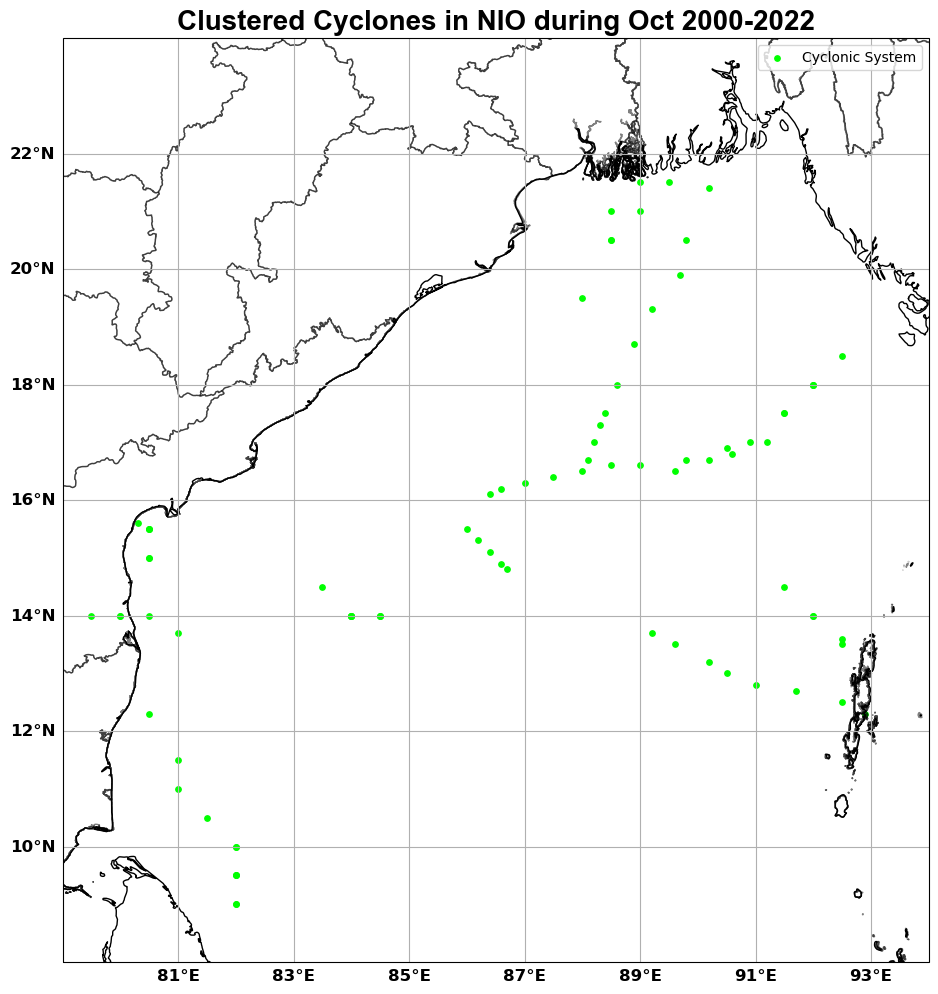

In [54]:
fname= r'F:\Indian Shape Files\Indian Administrative bourders\IND_adm\IND_adm1.shp'
adm1_shapes = list(shpreader.Reader(fname).geometries())
fname2 = r'F:\Indian Shape Files\Only Indian Boundaries\India_Boundary\India_Boundary.shp'
adm1_shapes2 = list(shpreader.Reader(fname2).geometries())

lonmin =79
lonmax =94
latmin =8
latmax =24


def main():
    plt.figure(figsize=(15,12),facecolor = 'white')
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([lonmin,lonmax,latmin,latmax], crs=ccrs.PlateCarree()) # [lonmin,lonmax,latmin,latmax]68,98,8,38
    ax.coastlines()
    ax.add_geometries(adm1_shapes, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.5,lw = 1, facecolor='none') #
    ax.add_geometries(adm1_shapes2, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.5,lw = 1, facecolor='none') #
    ax.set_facecolor('white')
    ax.set_title('Clustered Cyclones in NIO during Oct 2000-2022' ,
                  fontweight="bold", size=20,family= 'Arial')
    filled_c = plt.pcolormesh(modis.lon, modis.lat,np.mean(modis.Optical_Depth_Land_And_Ocean[:,:,:],axis=0), vmin=0, vmax=2, cmap='jet', transform=ccrs.PlateCarree())
    ax.scatter(cyclon['longitude  (Long)'],cyclon['Latitude (lat)'],s=15,alpha=1,c='lime',label='Cyclonic System')
#     ax.scatter(sever['longitude  (Long)'],sever['Latitude (lat)'],s=15,alpha=1,c='purple',label='Severe Cyclonic System')
#     ax.scatter(very['longitude  (Long)'],very['Latitude (lat)'],s=15,alpha=1,c='magenta',label='Very Severe Cyclonic System')
#     ax.scatter(extra['longitude  (Long)'],extra['Latitude (lat)'],s=15,alpha=1,c='red',label='Extra Severe Cyclonic System')
    
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = mticker.FixedLocator(np.arange(lonmin,lonmax,2))
    gl.ylocator = mticker.FixedLocator(np.arange(latmin,latmax,2))
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 12,'color': 'black', 'weight': 'bold'}
    gl.ylabel_style = {'size': 12,'color': 'black', 'weight': 'bold'}
        # Add a colorbar for the filled contour.
#     a = plt.colorbar(filled_c,ax=ax, orientation='vertical',pad=0.05,shrink=0.75)
#     a.set_label(label=f'AOD',weight='bold', fontsize='15')
#     plt.figtext(0.25, 0.085, "\xa9 kmmraoiitm@gmail.com", ha="center", 
#                 fontsize=15)#box={"facecolor": "green", "alpha": 0.75})
    plt.legend()

if __name__ == '__main__':
    main()
# plt.savefig('ond_g1_depression_2000_2022.jpg',bbox_inches='tight',dpi=1080)
plt.show()

In [28]:
o.info()
o.columns#[0:10]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 820 entries, 23 to 152
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Date(DD-MM-YYYY)_Time (UTC)                    820 non-null    datetime64[ns]
 1   Serial Number of system during year            560 non-null    float64       
 2   Basin of origin                                820 non-null    object        
 3   Name                                           725 non-null    object        
 4   Latitude (lat)                                 820 non-null    float64       
 5   longitude  (Long)                              809 non-null    float64       
 6   CI No [or "T. No"]                             713 non-null    float64       
 7   Estimated Central Pressure (hPa) [or "E.C.P"]  820 non-null    object        
 8   Maximum Sustained Surface Wind (kt)            820 non-null

Index(['Date(DD-MM-YYYY)_Time (UTC)', 'Serial Number of system during year',
       'Basin of origin', 'Name', 'Latitude (lat)', 'longitude  (Long)',
       'CI No [or "T. No"]', 'Estimated Central Pressure (hPa) [or "E.C.P"]',
       'Maximum Sustained Surface Wind (kt) ',
       'Pressure Drop(hPa)[or"delta P"]', 'Grade (text)', 'Type',
       'Pressure Drop (hPa)[or "delta P"]'],
      dtype='object')

In [41]:
o_l = o_l[o_l['Type'] != 'Land']

In [45]:
o_l.to_excel('all_cyclones_bob_oct_2000_2022.xlsx')

In [37]:
o_l = o_l[o_l['Basin of origin'] != 'ARB']

In [35]:
o_l

,Date(DD-MM-YYYY)_Time (UTC),Serial Number of system during year,Basin of origin,Name,Latitude (lat),longitude (Long),"CI No [or ""T. No""]","Estimated Central Pressure (hPa) [or ""E.C.P""]",Maximum Sustained Surface Wind (kt),"Pressure Drop(hPa)[or""delta P""]",Grade (text),Type,"Pressure Drop (hPa)[or ""delta P""]"
23,2000-10-15 00:00:00,3.0,BOB,NaN,14.5,88.5,1.5,1004,25,4,D,Ocean,NaN
24,2000-10-15 03:00:00,3.0,BOB,NaN,14.5,88.5,1.5,1004,25,4,D,Ocean,NaN
25,2000-10-15 06:00:00,3.0,BOB,NaN,14.5,88.0,1.5,1002,25,4,D,Ocean,NaN
26,2000-10-15 12:00:00,3.0,BOB,NaN,14.5,87.0,1.5,1000,25,4,D,Ocean,NaN
27,2000-10-15 18:00:00,3.0,BOB,NaN,14.5,86.5,2.0,1002,30,6,DD,Ocean,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,2022-10-24 12:00:00,NaN,BOB,Sitrang,20.5,89.8,2.5,996,45,NaN,CS,Ocean,10.0
149,2022-10-24 15:00:00,NaN,BOB,Sitrang,21.4,90.2,2.5,996,45,NaN,CS,Ocean,10.0
150,2022-10-24 18:00:00,NaN,BOB,Sitrang,23.5,90.8,NaN,996,40,NaN,CS,Land,8.0
151,2022-10-24 21:00:00,NaN,BOB,Sitrang,24.3,91.0,NaN,998,30,NaN,DD,Land,6.0


In [68]:
lat_mins = [21,21,21,19,19,19,19,19,
           17,17,17,17,17,17,15,15,15,15,15,15,15,13,13,13,13,13,13,13,13,
           11,11,11,11,11,11,11,11,9,9,9,9,9,9,9,9]
lat_maxs = [23,23,23,21,21,21,21,21,19,19,19,19,19,19,17,17,17,17,17,17,17,
           15,15,15,15,15,15,15,15,13,13,13,13,13,13,13,13,
           11,11,11,11,11,11,11,11]
lon_mins = [87,89,91,85,87,89,91,93,83,85,87,89,91,93,81,83,85,87,89,
           91,93,79,81,83,85,87,89,91,93,79,81,83,85,87,89,91,
           93,79,81,83,85,87,89,91,93]
lon_maxs = [89,91,93,87,89,91,93,95,85,87,89,91,93,95,83,85,87,89,
           91,93,95,81,83,85,87,89,91,93,95,81,83,85,87,89,91,93,95,
           81,83,85,87,89,1,93,95]
grids = np.arange(0,45)

In [69]:
for i in grids:
    lat_min = lat_mins[i]
    lat_max = lat_maxs[i]
    lon_min = lon_mins[i]
    lon_max = lon_maxs[i]
    # Select DataFrame rows between two dates
    mask_season1 = (o_l['Latitude (lat)'] >= lat_min) & (o_l['Latitude (lat)'] < lat_max)                
    grid_a = o_l.loc[mask_season1]
    mask_season2 = (grid_a['longitude  (Long)'] >= lon_min) & (grid_a['longitude  (Long)'] < lon_max)
    grid_b = grid_a.loc[mask_season2]

    grid_b.to_excel('oct_cs_bob_grid'+str(i)+'.xlsx')
    del grid_a
    del grid_b

In [81]:
m27102000 = xr.open_dataset(r'C:\Users\IITM\Downloads\MERRA2_200.tavg1_2d_aer_Nx.20001027.nc4')


In [85]:
m27102000

<xarray.Dataset>
Dimensions:    (lon: 576, lat: 361, time: 24)
Coordinates:
  * lon        (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat        (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * time       (time) datetime64[ns] 2000-10-27T00:30:00 ... 2000-10-27T23:30:00
Data variables: (12/50)
    BCANGSTR   (time, lat, lon) float32 ...
    BCCMASS    (time, lat, lon) float32 ...
    BCEXTTAU   (time, lat, lon) float32 ...
    BCFLUXU    (time, lat, lon) float32 ...
    BCFLUXV    (time, lat, lon) float32 ...
    BCSCATAU   (time, lat, lon) float32 ...
    ...         ...
    SUFLUXU    (time, lat, lon) float32 ...
    SUFLUXV    (time, lat, lon) float32 ...
    SUSCATAU   (time, lat, lon) float32 ...
    TOTANGSTR  (time, lat, lon) float32 ...
    TOTEXTTAU  (time, lat, lon) float32 ...
    TOTSCATAU  (time, lat, lon) float32 ...
Attributes: (12/30)
    History:                           Original file generated: Sat Jan 31 06...
    Comment:                           GMAO filename: d5124_m2_jan91.tavg1_2d...
    Filename:                          MERRA2_200.tavg1_2d_aer_Nx.20001027.nc4
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/KLICLTZ8EM9D
    RangeBeginningDate:                2000-10-27
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   2000-10-27
    RangeEndingTime:                   23:59:59.000000

In [88]:
pm25_27102000_21 = m27102000.DUSMASS25[21] + m27102000.OCSMASS[21]+ m27102000.BCSMASS[21] + m27102000.SSSMASS25[21] + (m27102000.SO4SMASS[21]* (132.14/96.06))

In [95]:
pm25_27102000_21.min()

<xarray.DataArray ()>
array(4.34636251e-11)
Coordinates:
    time     datetime64[ns] 2000-10-27T21:30:00

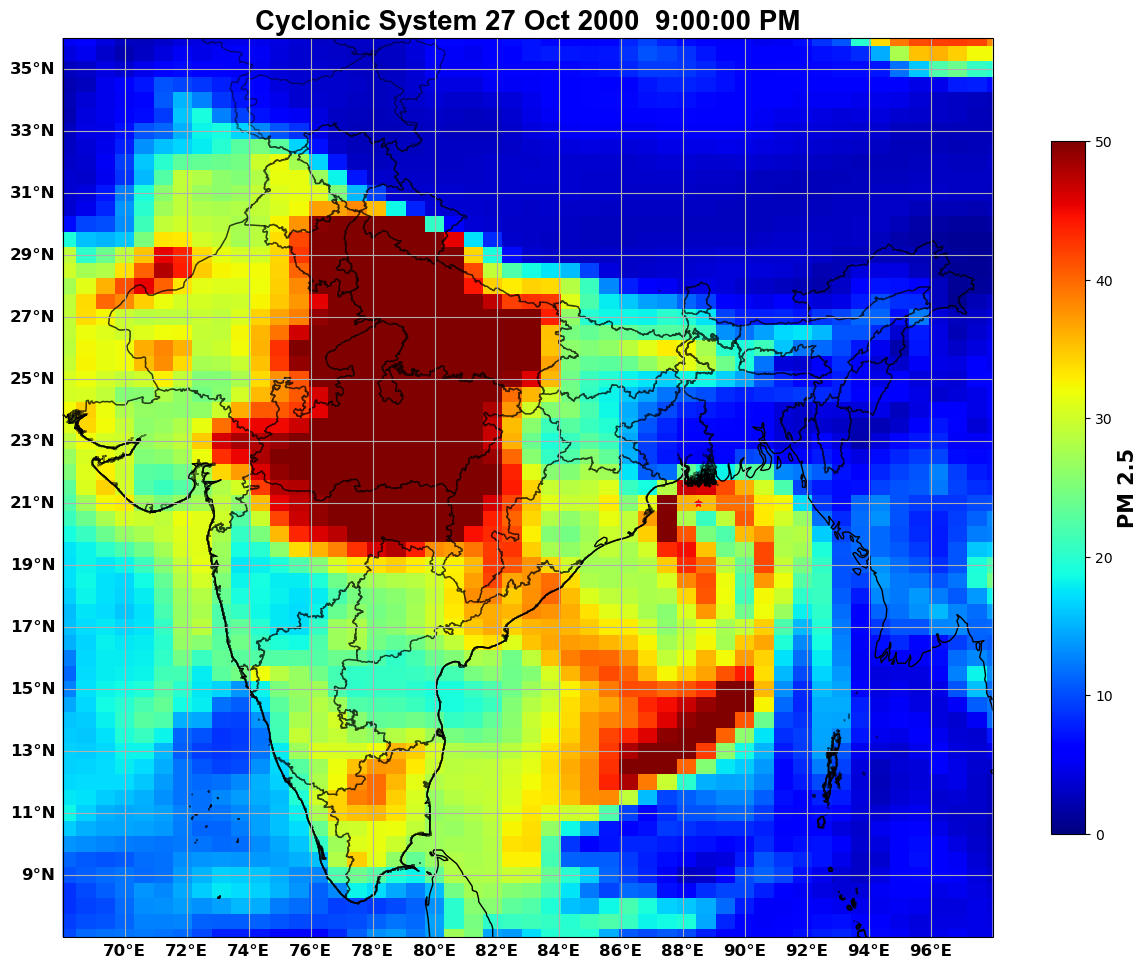

In [110]:
fname= r'F:\Indian Shape Files\Indian Administrative bourders\IND_adm\IND_adm1.shp'
adm1_shapes = list(shpreader.Reader(fname).geometries())
fname2 = r'F:\Indian Shape Files\Only Indian Boundaries\India_Boundary\India_Boundary.shp'
adm1_shapes2 = list(shpreader.Reader(fname2).geometries())

lonmin =68
lonmax =98
latmin =7
latmax =36


def main():
    plt.figure(figsize=(15,12),facecolor = 'white')
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([lonmin,lonmax,latmin,latmax], crs=ccrs.PlateCarree()) # [lonmin,lonmax,latmin,latmax]68,98,8,38
    ax.coastlines()
    ax.add_geometries(adm1_shapes, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.5,lw = 1, facecolor='none') #
    ax.add_geometries(adm1_shapes2, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.5,lw = 1, facecolor='none') #
    ax.set_facecolor('white')
    ax.set_title('Cyclonic System 27 Oct 2000  9:00:00 PM' ,
                  fontweight="bold", size=20,family= 'Arial')
    filled_c = plt.pcolormesh(pm25_27102000_21.lon, pm25_27102000_21.lat,(pm25_27102000_21*1e+9), vmin=0, vmax=50, cmap='jet', transform=ccrs.PlateCarree())
    ax.scatter(88.5,21,21.4	90.2,c='red',s=25,marker='*')
#     ax.scatter(sever['longitude  (Long)'],sever['Latitude (lat)'],s=15,alpha=1,c='purple',label='Severe Cyclonic System')
#     ax.scatter(very['longitude  (Long)'],very['Latitude (lat)'],s=15,alpha=1,c='magenta',label='Very Severe Cyclonic System')
#     ax.scatter(extra['longitude  (Long)'],extra['Latitude (lat)'],s=15,alpha=1,c='red',label='Extra Severe Cyclonic System')
    
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = mticker.FixedLocator(np.arange(lonmin,lonmax,2))
    gl.ylocator = mticker.FixedLocator(np.arange(latmin,latmax,2))
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 12,'color': 'black', 'weight': 'bold'}
    gl.ylabel_style = {'size': 12,'color': 'black', 'weight': 'bold'}
        # Add a colorbar for the filled contour.
    a = plt.colorbar(filled_c,ax=ax, orientation='vertical',pad=0.05,shrink=0.75)
    a.set_label(label=f'PM 2.5',weight='bold', fontsize='15')
#     plt.figtext(0.25, 0.085, "\xa9 kmmraoiitm@gmail.com", ha="center", 
#                 fontsize=15)#box={"facecolor": "green", "alpha": 0.75})
#     plt.legend()

if __name__ == '__main__':
    main()
plt.savefig('CS_27oct2000_2100.jpg',bbox_inches='tight',dpi=1080)
plt.show()

In [113]:
m28102000 = xr.open_dataset(r'C:\Users\IITM\Downloads\MERRA2_200.tavg1_2d_aer_Nx.20001028.nc4') #00
m26102008 = xr.open_dataset(r'C:\Users\IITM\Downloads\MERRA2_300.tavg1_2d_aer_Nx.20081026.nc4') # 18 21
m24102022 = xr.open_dataset(r'C:\Users\IITM\Downloads\MERRA2_400.tavg1_2d_aer_Nx.20221024.nc4') # 15


In [114]:
pm25_28102000_00 = m28102000.DUSMASS25[0] + m28102000.OCSMASS[0]+ m28102000.BCSMASS[0] + m28102000.SSSMASS25[0] + (m28102000.SO4SMASS[0]* (132.14/96.06))
pm25_26102008_18 = m26102008.DUSMASS25[18] + m26102008.OCSMASS[18]+ m26102008.BCSMASS[18] + m26102008.SSSMASS25[18] + (m26102008.SO4SMASS[18]* (132.14/96.06))
pm25_26102008_21 = m26102008.DUSMASS25[21] + m26102008.OCSMASS[21]+ m26102008.BCSMASS[21] + m26102008.SSSMASS25[21] + (m26102008.SO4SMASS[21]* (132.14/96.06))
pm25_24102022_15 = m24102022.DUSMASS25[15] + m24102022.OCSMASS[15]+ m24102022.BCSMASS[15] + m24102022.SSSMASS25[15] + (m24102022.SO4SMASS[15]* (132.14/96.06))


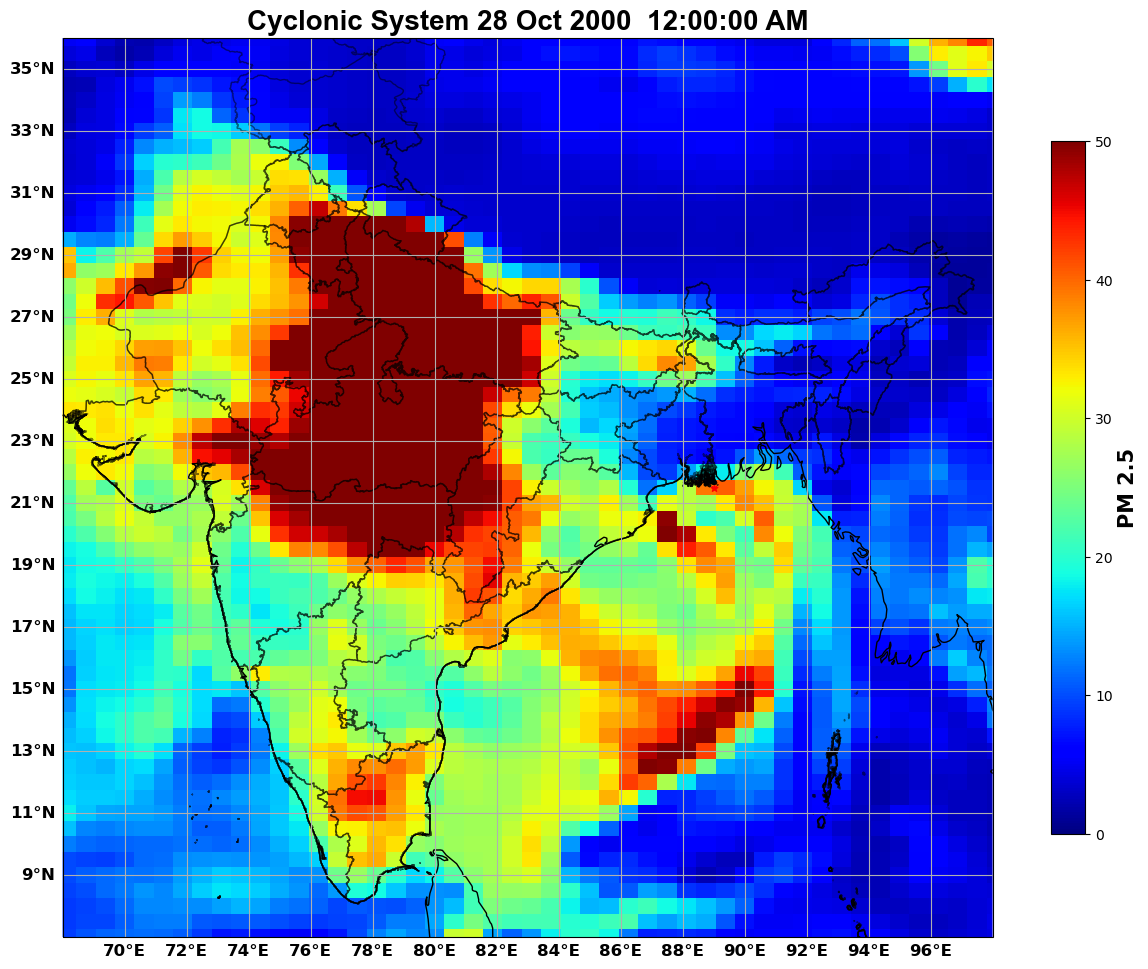

In [117]:
fname= r'F:\Indian Shape Files\Indian Administrative bourders\IND_adm\IND_adm1.shp'
adm1_shapes = list(shpreader.Reader(fname).geometries())
fname2 = r'F:\Indian Shape Files\Only Indian Boundaries\India_Boundary\India_Boundary.shp'
adm1_shapes2 = list(shpreader.Reader(fname2).geometries())

lonmin =68
lonmax =98
latmin =7
latmax =36


def main():
    plt.figure(figsize=(15,12),facecolor = 'white')
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([lonmin,lonmax,latmin,latmax], crs=ccrs.PlateCarree()) # [lonmin,lonmax,latmin,latmax]68,98,8,38
    ax.coastlines()
    ax.add_geometries(adm1_shapes, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.5,lw = 1, facecolor='none') #
    ax.add_geometries(adm1_shapes2, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.5,lw = 1, facecolor='none') #
    ax.set_facecolor('white')
    ax.set_title('Cyclonic System 28 Oct 2000  12:00:00 AM' ,
                  fontweight="bold", size=20,family= 'Arial')
    filled_c = plt.pcolormesh(pm25_28102000_00.lon, pm25_28102000_00.lat,(pm25_28102000_00*1e+9), vmin=0, vmax=50, cmap='jet', transform=ccrs.PlateCarree())
    ax.scatter(89,21.5,c='red',s=25,marker='*')
#     ax.scatter(sever['longitude  (Long)'],sever['Latitude (lat)'],s=15,alpha=1,c='purple',label='Severe Cyclonic System')
#     ax.scatter(very['longitude  (Long)'],very['Latitude (lat)'],s=15,alpha=1,c='magenta',label='Very Severe Cyclonic System')
#     ax.scatter(extra['longitude  (Long)'],extra['Latitude (lat)'],s=15,alpha=1,c='red',label='Extra Severe Cyclonic System')
    
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = mticker.FixedLocator(np.arange(lonmin,lonmax,2))
    gl.ylocator = mticker.FixedLocator(np.arange(latmin,latmax,2))
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 12,'color': 'black', 'weight': 'bold'}
    gl.ylabel_style = {'size': 12,'color': 'black', 'weight': 'bold'}
        # Add a colorbar for the filled contour.
    a = plt.colorbar(filled_c,ax=ax, orientation='vertical',pad=0.05,shrink=0.75)
    a.set_label(label=f'PM 2.5',weight='bold', fontsize='15')
#     plt.figtext(0.25, 0.085, "\xa9 kmmraoiitm@gmail.com", ha="center", 
#                 fontsize=15)#box={"facecolor": "green", "alpha": 0.75})
#     plt.legend()

if __name__ == '__main__':
    main()
plt.savefig('CS_28oct2000_0000.jpg',bbox_inches='tight',dpi=1080)
plt.show()

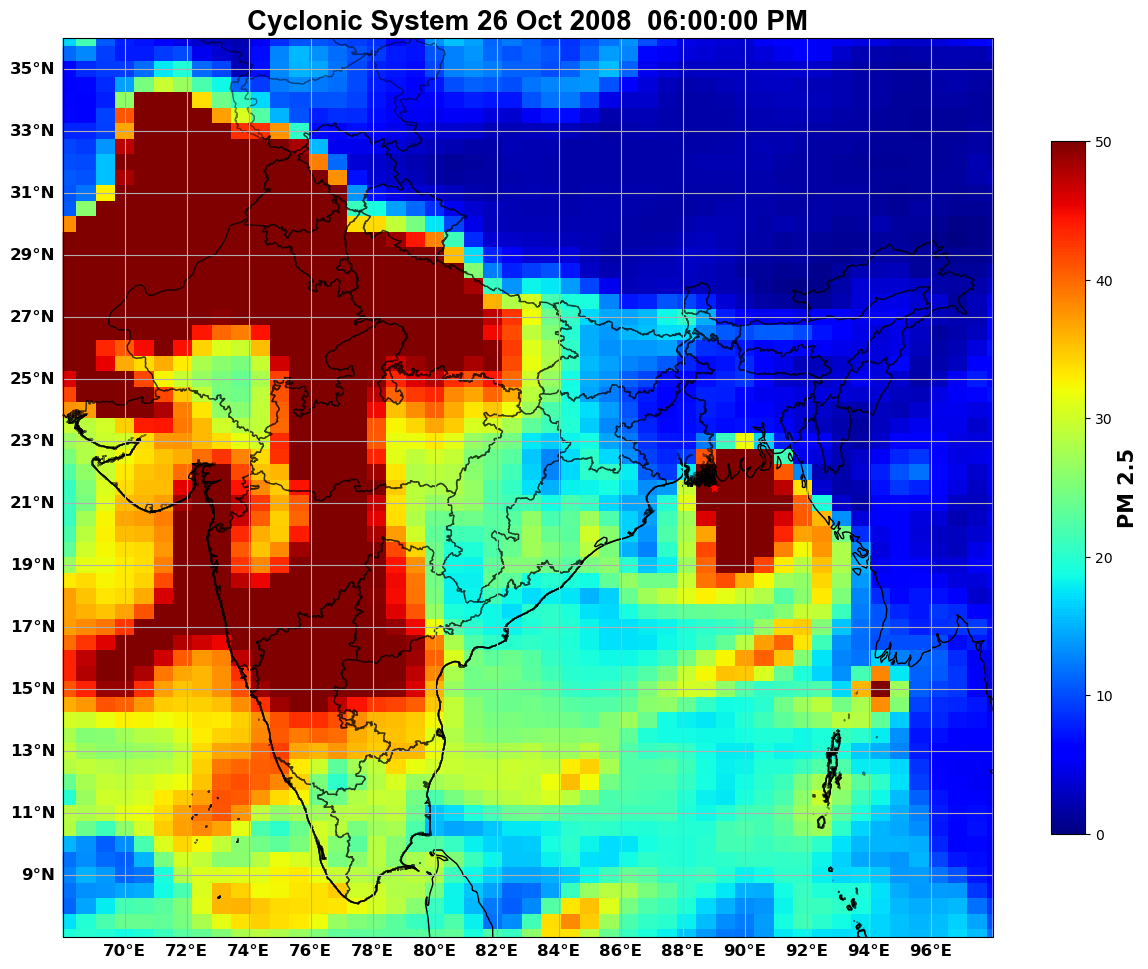

In [119]:
fname= r'F:\Indian Shape Files\Indian Administrative bourders\IND_adm\IND_adm1.shp'
adm1_shapes = list(shpreader.Reader(fname).geometries())
fname2 = r'F:\Indian Shape Files\Only Indian Boundaries\India_Boundary\India_Boundary.shp'
adm1_shapes2 = list(shpreader.Reader(fname2).geometries())

lonmin =68
lonmax =98
latmin =7
latmax =36


def main():
    plt.figure(figsize=(15,12),facecolor = 'white')
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([lonmin,lonmax,latmin,latmax], crs=ccrs.PlateCarree()) # [lonmin,lonmax,latmin,latmax]68,98,8,38
    ax.coastlines()
    ax.add_geometries(adm1_shapes, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.5,lw = 1, facecolor='none') #
    ax.add_geometries(adm1_shapes2, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.5,lw = 1, facecolor='none') #
    ax.set_facecolor('white')
    ax.set_title('Cyclonic System 26 Oct 2008  06:00:00 PM' ,
                  fontweight="bold", size=20,family= 'Arial')
    filled_c = plt.pcolormesh(pm25_26102008_18.lon, pm25_26102008_18.lat,(pm25_26102008_18*1e+9), vmin=0, vmax=50, cmap='jet', transform=ccrs.PlateCarree())
    ax.scatter(89,21.5,c='red',s=25,marker='*')
#     ax.scatter(sever['longitude  (Long)'],sever['Latitude (lat)'],s=15,alpha=1,c='purple',label='Severe Cyclonic System')
#     ax.scatter(very['longitude  (Long)'],very['Latitude (lat)'],s=15,alpha=1,c='magenta',label='Very Severe Cyclonic System')
#     ax.scatter(extra['longitude  (Long)'],extra['Latitude (lat)'],s=15,alpha=1,c='red',label='Extra Severe Cyclonic System')
    
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = mticker.FixedLocator(np.arange(lonmin,lonmax,2))
    gl.ylocator = mticker.FixedLocator(np.arange(latmin,latmax,2))
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 12,'color': 'black', 'weight': 'bold'}
    gl.ylabel_style = {'size': 12,'color': 'black', 'weight': 'bold'}
        # Add a colorbar for the filled contour.
    a = plt.colorbar(filled_c,ax=ax, orientation='vertical',pad=0.05,shrink=0.75)
    a.set_label(label=f'PM 2.5',weight='bold', fontsize='15')
#     plt.figtext(0.25, 0.085, "\xa9 kmmraoiitm@gmail.com", ha="center", 
#                 fontsize=15)#box={"facecolor": "green", "alpha": 0.75})
#     plt.legend()

if __name__ == '__main__':
    main()
plt.savefig('CS_26oct2008_1800.jpg',bbox_inches='tight',dpi=1080)
plt.show()

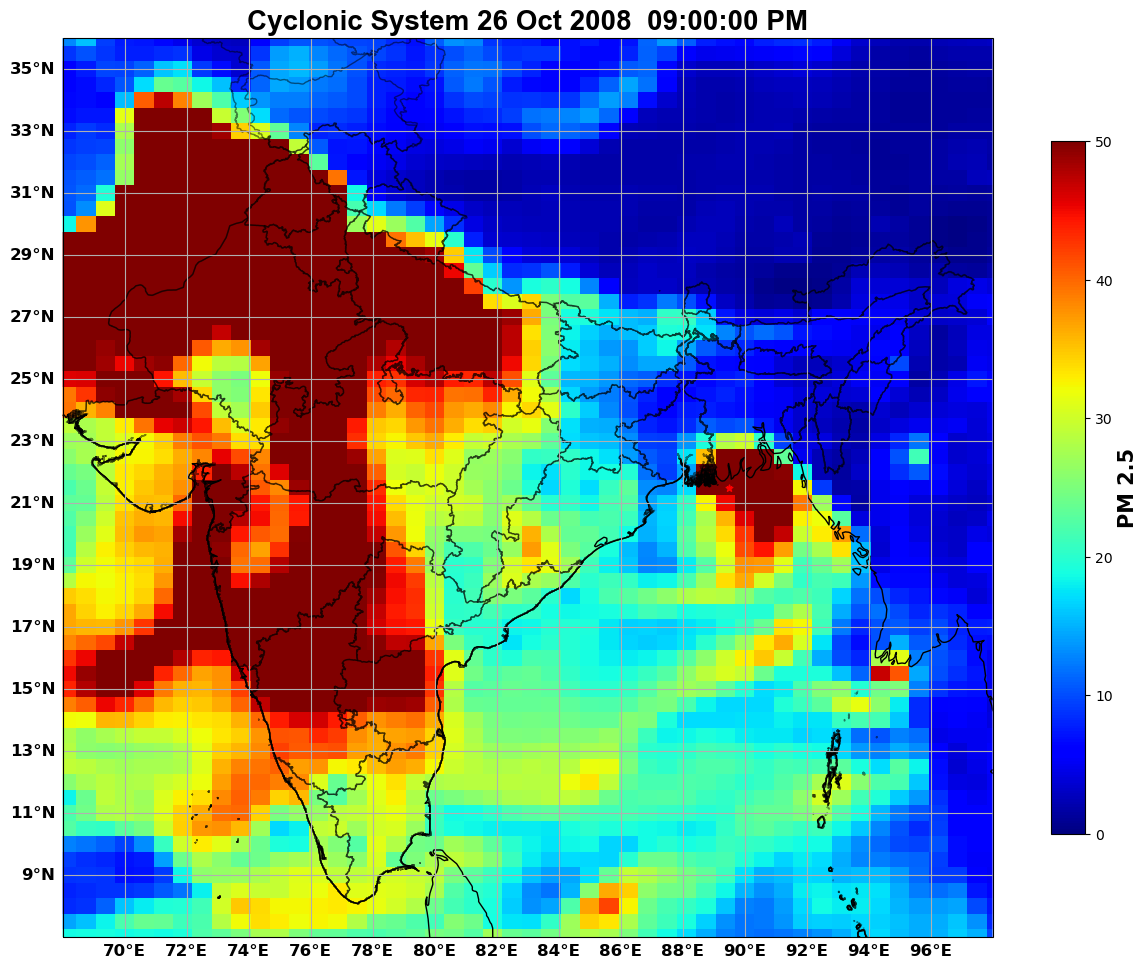

In [120]:
fname= r'F:\Indian Shape Files\Indian Administrative bourders\IND_adm\IND_adm1.shp'
adm1_shapes = list(shpreader.Reader(fname).geometries())
fname2 = r'F:\Indian Shape Files\Only Indian Boundaries\India_Boundary\India_Boundary.shp'
adm1_shapes2 = list(shpreader.Reader(fname2).geometries())

lonmin =68
lonmax =98
latmin =7
latmax =36


def main():
    plt.figure(figsize=(15,12),facecolor = 'white')
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([lonmin,lonmax,latmin,latmax], crs=ccrs.PlateCarree()) # [lonmin,lonmax,latmin,latmax]68,98,8,38
    ax.coastlines()
    ax.add_geometries(adm1_shapes, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.5,lw = 1, facecolor='none') #
    ax.add_geometries(adm1_shapes2, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.5,lw = 1, facecolor='none') #
    ax.set_facecolor('white')
    ax.set_title('Cyclonic System 26 Oct 2008  09:00:00 PM' ,
                  fontweight="bold", size=20,family= 'Arial')
    filled_c = plt.pcolormesh(pm25_26102008_21.lon, pm25_26102008_21.lat,(pm25_26102008_21*1e+9), vmin=0, vmax=50, cmap='jet', transform=ccrs.PlateCarree())
    ax.scatter(89.5,21.5,c='red',s=25,marker='*')
#     ax.scatter(sever['longitude  (Long)'],sever['Latitude (lat)'],s=15,alpha=1,c='purple',label='Severe Cyclonic System')
#     ax.scatter(very['longitude  (Long)'],very['Latitude (lat)'],s=15,alpha=1,c='magenta',label='Very Severe Cyclonic System')
#     ax.scatter(extra['longitude  (Long)'],extra['Latitude (lat)'],s=15,alpha=1,c='red',label='Extra Severe Cyclonic System')
    
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = mticker.FixedLocator(np.arange(lonmin,lonmax,2))
    gl.ylocator = mticker.FixedLocator(np.arange(latmin,latmax,2))
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 12,'color': 'black', 'weight': 'bold'}
    gl.ylabel_style = {'size': 12,'color': 'black', 'weight': 'bold'}
        # Add a colorbar for the filled contour.
    a = plt.colorbar(filled_c,ax=ax, orientation='vertical',pad=0.05,shrink=0.75)
    a.set_label(label=f'PM 2.5',weight='bold', fontsize='15')
#     plt.figtext(0.25, 0.085, "\xa9 kmmraoiitm@gmail.com", ha="center", 
#                 fontsize=15)#box={"facecolor": "green", "alpha": 0.75})
#     plt.legend()

if __name__ == '__main__':
    main()
plt.savefig('CS_26oct2008_2100.jpg',bbox_inches='tight',dpi=1080)
plt.show()

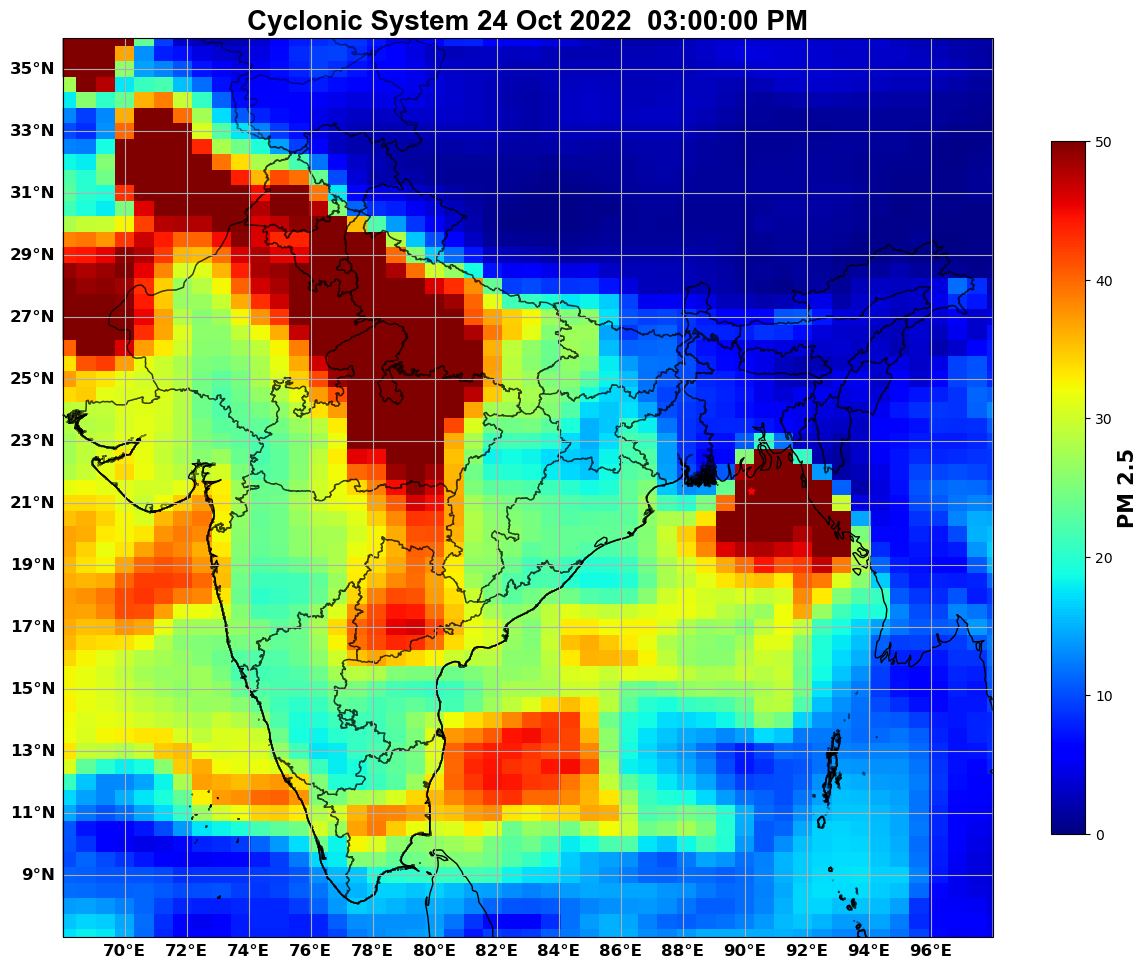

In [122]:
fname= r'F:\Indian Shape Files\Indian Administrative bourders\IND_adm\IND_adm1.shp'
adm1_shapes = list(shpreader.Reader(fname).geometries())
fname2 = r'F:\Indian Shape Files\Only Indian Boundaries\India_Boundary\India_Boundary.shp'
adm1_shapes2 = list(shpreader.Reader(fname2).geometries())

lonmin =68
lonmax =98
latmin =7
latmax =36


def main():
    plt.figure(figsize=(15,12),facecolor = 'white')
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([lonmin,lonmax,latmin,latmax], crs=ccrs.PlateCarree()) # [lonmin,lonmax,latmin,latmax]68,98,8,38
    ax.coastlines()
    ax.add_geometries(adm1_shapes, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.5,lw = 1, facecolor='none') #
    ax.add_geometries(adm1_shapes2, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.5,lw = 1, facecolor='none') #
    ax.set_facecolor('white')
    ax.set_title('Cyclonic System 24 Oct 2022  03:00:00 PM' ,
                  fontweight="bold", size=20,family= 'Arial')
    filled_c = plt.pcolormesh(pm25_24102022_15.lon, pm25_24102022_15.lat,(pm25_24102022_15*1e+9), vmin=0, vmax=50, cmap='jet', transform=ccrs.PlateCarree())
    ax.scatter(90.2,21.4,c='red',s=25,marker='*')
#     ax.scatter(sever['longitude  (Long)'],sever['Latitude (lat)'],s=15,alpha=1,c='purple',label='Severe Cyclonic System')
#     ax.scatter(very['longitude  (Long)'],very['Latitude (lat)'],s=15,alpha=1,c='magenta',label='Very Severe Cyclonic System')
#     ax.scatter(extra['longitude  (Long)'],extra['Latitude (lat)'],s=15,alpha=1,c='red',label='Extra Severe Cyclonic System')
    
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = mticker.FixedLocator(np.arange(lonmin,lonmax,2))
    gl.ylocator = mticker.FixedLocator(np.arange(latmin,latmax,2))
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 12,'color': 'black', 'weight': 'bold'}
    gl.ylabel_style = {'size': 12,'color': 'black', 'weight': 'bold'}
        # Add a colorbar for the filled contour.
    a = plt.colorbar(filled_c,ax=ax, orientation='vertical',pad=0.05,shrink=0.75)
    a.set_label(label=f'PM 2.5',weight='bold', fontsize='15')
#     plt.figtext(0.25, 0.085, "\xa9 kmmraoiitm@gmail.com", ha="center", 
#                 fontsize=15)#box={"facecolor": "green", "alpha": 0.75})
#     plt.legend()

if __name__ == '__main__':
    main()
plt.savefig('CS_24oct2022_1500.jpg',bbox_inches='tight',dpi=1080)
plt.show()